In [1]:
import numpy as np
import matplotlib.pyplot as plt
from hmlstm_network import HMLSTMNetwork
import tensorflow as tf
from text_input_utils import prepare_inputs
import tensorflow as tf
from string import ascii_lowercase

%matplotlib inline
%load_ext autoreload
%autoreload 2

### Regression example

In [2]:
# simulate multiresolution data
num_signals = 100
signal_length = 300
x = np.linspace(0, 120 * np.pi, signal_length)
signals = [np.random.normal(0, .5, size=signal_length) +
           (2 * np.sin(.6 * x + np.random.random() * 100 * np.pi))
           + (5 * np.sin(.1* x + np.random.random() * 100 * np.pi))
           +( 10 * np.sin(.03 * x + np.random.random() * 100 * np.pi))
    for _ in range(num_signals)]

split = int(num_signals * .8)
train = signals[:split]
test = signals[split:]

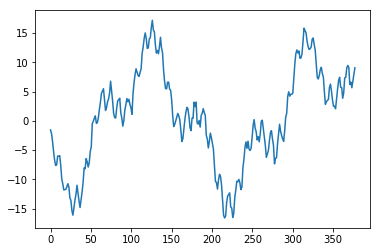

In [3]:
# example signal
plt.plot(x, signals[2]);

In [4]:
# prepare data
train_batches_in = []
train_batches_out = []
batch_size = 1
start = 0
while start + batch_size < len(train):
    batch = train[start: start + batch_size]
    
    train_batches_in.append(np.array([s[:-1] for s in batch]).reshape(batch_size, -1, 1))
    train_batches_out.append(np.array([s[1:] for s in batch]).reshape(batch_size, -1, 1))

    start += batch_size
    
    
batch_size = 1
start = 0
test_batches_in = []
test_batches_out = []
while start + batch_size < len(test):
    batch = test[start: start + batch_size]
    
    test_batches_in.append(np.array([s[:-1] for s in batch]).reshape(batch_size, -1, 1))
    test_batches_out.append(np.array([s[1:] for s in batch]).reshape(batch_size, -1, 1))

    start += batch_size

In [5]:
tf.reset_default_graph()
network = HMLSTMNetwork(input_size=1, task='regression', hidden_state_sizes=100,
                       embed_size=100, out_hidden_size=100, num_layers=3)

In [12]:
network.train(train_batches_in, train_batches_out, load_existing_vars=True, epochs=3)

loading variables...
INFO:tensorflow:Restoring parameters from ./hmlstm.ckpt
Epoch 0
loss: 352.278
loss: 353.292
loss: 353.953
loss: 325.246
loss: 328.067
loss: 336.099
loss: 332.636
loss: 293.599
loss: 313.406
loss: 310.744
loss: 321.693
loss: 339.841
loss: 338.556
loss: 345.379
loss: 339.773
loss: 359.742
loss: 270.099
loss: 335.504
loss: 300.88
loss: 282.517
loss: 280.845
loss: 282.848
loss: 328.061
loss: 334.171
loss: 333.858
loss: 320.832
loss: 278.946
loss: 321.875
loss: 298.715
loss: 301.087
loss: 323.83
loss: 327.811
loss: 319.874
loss: 346.719
loss: 364.507
loss: 296.16
loss: 351.404
loss: 280.519
loss: 309.766
loss: 352.403
loss: 284.048
loss: 302.092
loss: 307.304
loss: 290.286
loss: 306.229
loss: 293.657
loss: 308.954
loss: 277.331
loss: 307.96
loss: 348.578
loss: 315.66
loss: 297.738
loss: 327.923
loss: 277.74
loss: 259.554
loss: 290.005
loss: 302.157
loss: 332.773
loss: 269.389
loss: 316.721
loss: 280.943
loss: 246.029
loss: 297.032
loss: 269.126
loss: 319.056
loss: 291.0

In [13]:
batch_num = 3

In [14]:
boundaries = network.predict_boundaries(test_batches_in[batch_num][0])
print(boundaries[0])

loading variables...
INFO:tensorflow:Restoring parameters from ./hmlstm.ckpt
[[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.  1.  1.  0.  0.  0.  1.  1.  1.  1.  1.  0.  0.  0.  1.  1.  1.
   1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.  1.  1.  1.  1.  1.  1.  0.  1.  0.  1.  1.  1.  1.  1.  0.  0.
   0.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  

In [15]:
# test that indicators are valid
# TODO: figure out why first element is sometimes invalid
b = boundaries[0]
for l in range(1, len(b)):
    for i in range(1, len(b[0])):
        if b[l][i] == 1.:
            if b[l][i - 1] == 0.\
            and b[l - 1][i] == 0. \
            and b[l - 1][i - 1] == 0.:
                print(l, i)
                raise ValueError("Something's not right")

In [16]:
predictions = network.predict(test_batches_in[batch_num][0])

loading variables...
INFO:tensorflow:Restoring parameters from ./hmlstm.ckpt


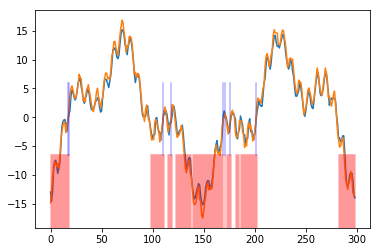

In [17]:
plt.plot(predictions.flatten())
plt.plot(test_batches_in[batch_num][0][1:])

colors = ['r', 'b', 'g', 'o']
for l, layer in enumerate(boundaries[0]):
    for i, indicator in enumerate(layer):
        if indicator == 1.:
            p = 1 / len(boundaries[0])
            plt.axvline(i, color=colors[l], ymin=(p*l), ymax=(p*(l + 1)), alpha=.3)

### Text classificaiton example

In [ ]:
tf.reset_default_graph()
network = HMLSTMNetwork(output_size=29, input_size=29,
                        embed_size=1024, out_hidden_size=500,
                        hidden_state_sizes=200)

In [ ]:
batch_size = 2
truncate_len = 100
num_layers = 3
num_batches = 100

inputs = prepare_inputs(
    batch_size=batch_size, truncate_len=truncate_len, num_batches=num_batches)

In [ ]:
# test on last input\
network.train(inputs[0][:-1], inputs[1][:-1], load_existing_vars=True)

In [51]:
# predictions on last input
indicators = network.predict_boundaries(inputs[0][-1][0], reuse=True)
indicators

array([[[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.

In [ ]:
# predictions on last input
predictions = network.predict(inputs[0][-1][0], reuse=True)

In [ ]:
def get_text(encoding):
    prediction = ''
    
    for char in np.squeeze(encoding):
        max_likelihood = np.where(char == np.max(char))[0][0]
        if max_likelihood < 26:
            prediction += ascii_lowercase[max_likelihood]
        elif max_likelihood == 26:
            prediction += ','
        elif max_likelihood == 27:
            prediction += '.'
        elif max_likelihood == 28:
            prediction += ' '
    
    return prediction

In [48]:
get_text(predictions)

'erl   nd ahes aoouene  ah te as eres eng   s ahrrl aetantanh ah tas  as   hhethaou  aooanthahh  oter'

In [49]:
get_text(inputs[0][-1][0][1:])

'ell. and this promises to be interesting. it would be a pity to miss it.   but your client     neve'